# Como Aumento do PIB e Gastos do Governo Impactam os Setores de Saúde e Educação?

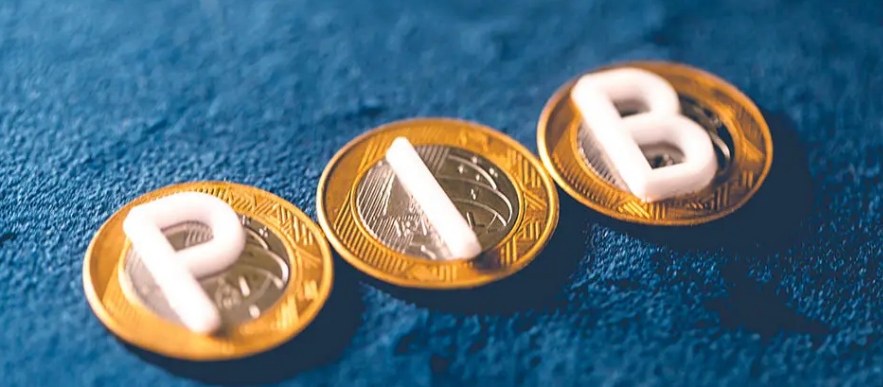

In [2]:
from IPython.display import Image
Image(filename='PIB.png') 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression

In [6]:
dados_egov = pd.read_excel('dataset.xlsx')

In [8]:
dados_egov.shape

(17, 16)

In [10]:
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2007,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2008,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2009,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2010,21.67777,40.938290,25.08140,5.873449,NaN,NaN,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2011,NaN,50.321873,NaN,5.997067,NaN,NaN,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


In [12]:
dados_egov.dtypes

ano_coleta                        int64
despesas_educ_percent           float64
despesas_saude_per_capita       float64
despesas_educ_total             float64
despesas_saude_%pib             float64
receita_trib_%pib               float64
receita_excl_doa_%pib           float64
ibrd_e_ida                      float64
pop_cresc_anual%                float64
pib_cresc_per_capita_%pib       float64
pib_deflator                    float64
domestic_saude_despesas_%pib    float64
pib_cresc_anual%                float64
pib_cor_us$                     float64
despesa_nac_bruta_%pib          float64
pib_moeda_local                   int64
dtype: object

In [16]:
dados_egov.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2015.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2007.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2011.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2015.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2019.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2023.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [20]:
dados_egov.isnull().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

In [40]:
#Tratamento de Valores Ausentes através de backfilling e interpolação
#bfill preenche os valores ausentes com o próximo valor não nulo encontrado na coluna, "preenchendo para trás". 
dados_egov['receita_trib_%pib'] = dados_egov['receita_trib_%pib'].bfill()
dados_egov['receita_excl_doa_%pib'] = dados_egov['receita_excl_doa_%pib'].bfill()

dados_egov = dados_egov.interpolate(method='linear')

In [36]:
dados_egov.isnull().sum()

ano_coleta                      0
despesas_educ_percent           0
despesas_saude_per_capita       0
despesas_educ_total             0
despesas_saude_%pib             0
receita_trib_%pib               0
receita_excl_doa_%pib           0
ibrd_e_ida                      0
pop_cresc_anual%                0
pib_cresc_per_capita_%pib       0
pib_deflator                    0
domestic_saude_despesas_%pib    0
pib_cresc_anual%                0
pib_cor_us$                     0
despesa_nac_bruta_%pib          0
pib_moeda_local                 0
dtype: int64

In [38]:
dados_egov.shape

(17, 16)

In [42]:
#arredondar os valores para 4 casas decimais
dados_egoc = dados_egov.round(4)

In [44]:
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2007,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2008,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2009,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2010,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2011,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


In [48]:
# Salvamos o dataset limpo
dados_egov.to_csv('dataset_limpo.csv', index = False)

## Análise de Dados

In [51]:
df = pd.read_csv('dataset_limpo.csv')

### 1- Em Que Ano o País Teve um Alto Crescimento do PIB Per Capita?

In [54]:
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2007,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2008,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2009,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2010,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2011,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


<Axes: xlabel='ano_coleta'>

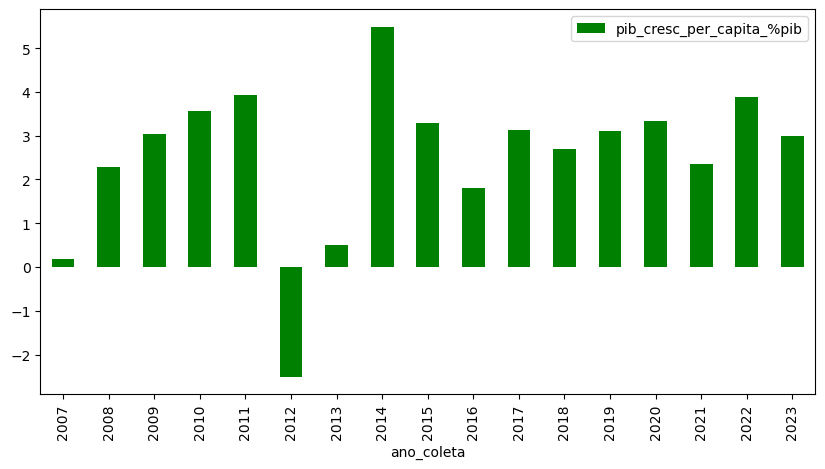

In [56]:
df.plot(x = "ano_coleta", y = ["pib_cresc_per_capita_%pib"], kind = "bar", figsize = (10,5), color = 'green')

### 2- Qual Ano Teve as Maiores Despesas com Saúde?

In [59]:
df['gasto_nac_bruto'] = df["despesa_nac_bruta_%pib"] / 100 * df["pib_moeda_local"]
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto
0,2007,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000,1.264570e+12
1,2008,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000,1.406187e+12
2,2009,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000,1.563375e+12
3,2010,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000,2.033579e+12
4,2011,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000,2.365220e+12


In [61]:
df["gasto_saude"] = df["domestic_saude_despesas_%pib"] / 100 * df["gasto_nac_bruto"]
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude
0,2007,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000,1.264570e+12,1.882215e+10
1,2008,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000,1.406187e+12,1.991171e+10
2,2009,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000,1.563375e+12,2.318002e+10
3,2010,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000,2.033579e+12,2.965886e+10
4,2011,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000,2.365220e+12,3.681193e+10


<Axes: xlabel='ano_coleta'>

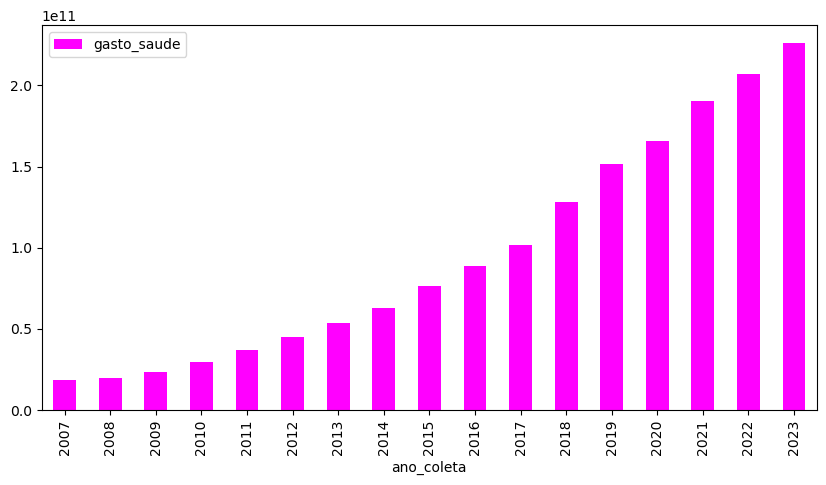

In [63]:
df.plot(x = "ano_coleta", y = ["gasto_saude"], kind = "bar", figsize = (10,5), color = 'magenta')

### 3- Qual Ano Teve os Maiores Gastos com Educação?

In [66]:
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude
0,2007,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000,1.264570e+12,1.882215e+10
1,2008,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000,1.406187e+12,1.991171e+10
2,2009,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000,1.563375e+12,2.318002e+10
3,2010,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000,2.033579e+12,2.965886e+10
4,2011,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000,2.365220e+12,3.681193e+10


In [68]:
# Calculamos o gasto em educação e criamos uma variável
df["gasto_educ"] = df["despesas_educ_total"] / 100 * df["gasto_nac_bruto"]
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude,gasto_educ
0,2007,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000,1.264570e+12,1.882215e+10,3.158907e+11
1,2008,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000,1.406187e+12,1.991171e+10,3.750041e+11
2,2009,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000,1.563375e+12,2.318002e+10,4.294488e+11
3,2010,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000,2.033579e+12,2.965886e+10,5.100501e+11
4,2011,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000,2.365220e+12,3.681193e+10,5.664713e+11


<Axes: xlabel='ano_coleta'>

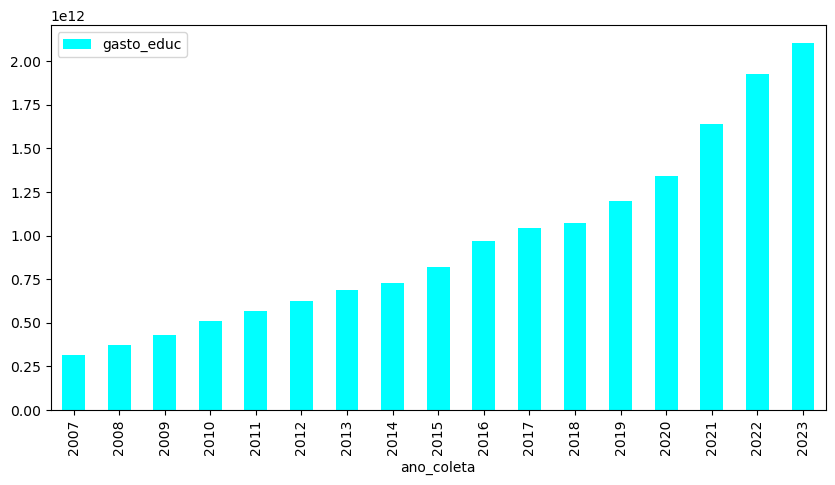

In [70]:
df.plot(x = 'ano_coleta', y = ['gasto_educ'], kind = "bar", figsize = (10,5), color = 'cyan')

### 4- Como a Receita do Governo se Correlaciona com a Despesa do Governo?

In [73]:
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude,gasto_educ
0,2007,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000,1.264570e+12,1.882215e+10,3.158907e+11
1,2008,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000,1.406187e+12,1.991171e+10,3.750041e+11
2,2009,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000,1.563375e+12,2.318002e+10,4.294488e+11
3,2010,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000,2.033579e+12,2.965886e+10,5.100501e+11
4,2011,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000,2.365220e+12,3.681193e+10,5.664713e+11


<Axes: >

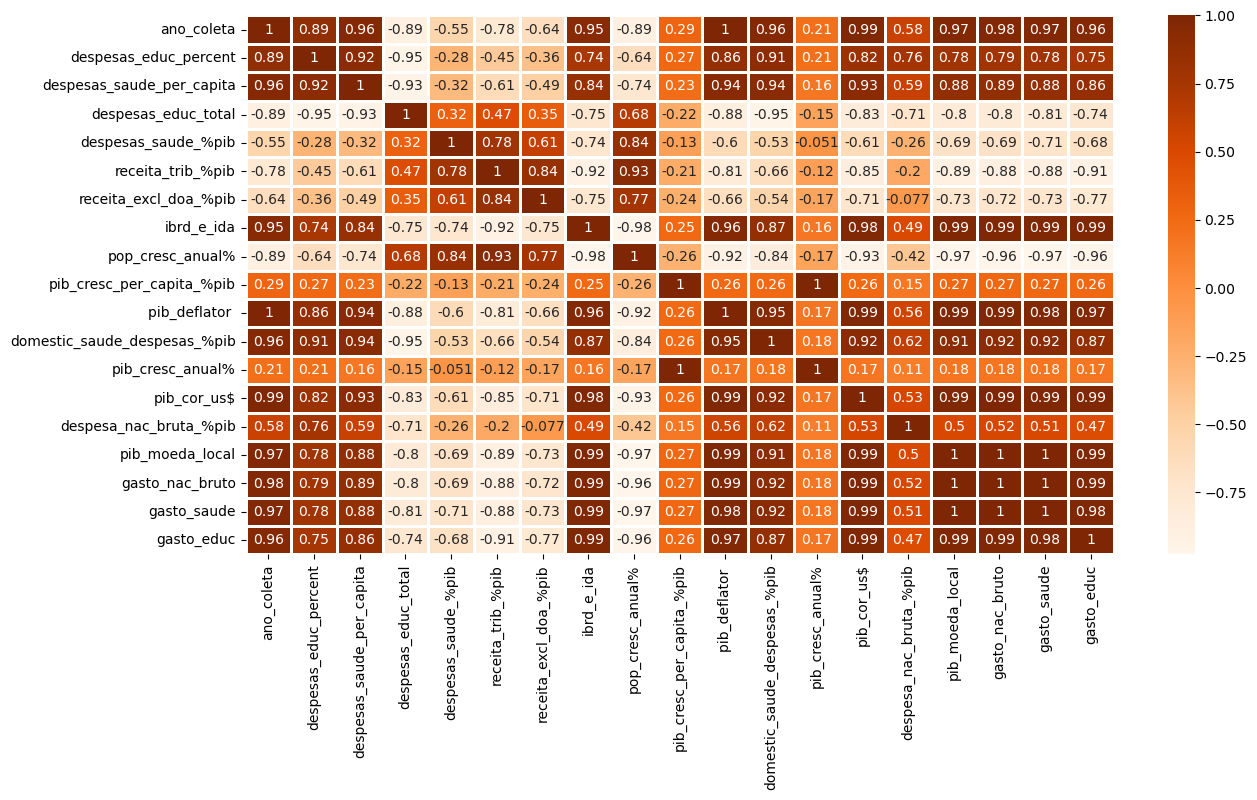

In [75]:
# Calcula a correlação entre as variáveis no conjunto de dados usando o método de Pearson
df2 = df.corr(method = 'pearson')

# Definindo o tamanho do gráfico
plt.figure(figsize = (14,7)) 

# Visualiza a correlação em um mapa de calor (heatmap)
# https://matplotlib.org/3.3.0/tutorials/colors/colormaps.html
sb.heatmap(df2, 
           xticklabels = df2.columns,
           yticklabels = df2.columns,
           cmap = 'Oranges',
           annot = True,
           linewidth = 0.8)

A partir dos coeficientes da matriz de correlação acima, obtemos as seguintes informações:

Receita de Impostos

Despesas com saúde (despesas_saude_%pib) tem uma forte correlação com a receita tributária do governo (receita_trib_%pib). O coeficiente de correlação é + 0,78 , o que indica que eles são diretamente proporcionais.

Despesas com educação (despesas_educ_total) tem uma boa correlação com a receita tributária (receita_trib_%pib). O coeficiente de correlação é + 0,47 , o que indica que são diretamente proporcionais, mas não da mesma forma que no setor saúde.

Receita de Empréstimos do BIRD e Créditos da AID

Despesas com saúde (despesas_saude_%pib) tem uma forte correlação com os empréstimos do BIRD e os créditos da AID (ibrd_e_ida). O coeficiente de correlação é + 0,74 , o que indica que eles são diretamente proporcionais.

As despesas com educação (despesas_educ_total) têm uma correlação significativamente forte com os empréstimos do BIRD e os créditos da AID (ibrd_e_ida). O coeficiente de correlação é + 0,75 , o que indica que eles são diretamente proporcionais. Também indica que a educação é principalmente financiada por meio de empréstimos do BIRD e créditos da AID, em oposição à receita fiscal do governo.

### 5 -  Como os Gastos do Governo com Educação e Saúde Afetam o Crescimento do PIB?

In [84]:
# Adicionando os gastos de saúde e educação
df['total_gastos_educ_saude'] = df['gasto_educ'] + df['gasto_saude']
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude,gasto_educ,total_gastos_educ_saude
0,2007,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000,1.264570e+12,1.882215e+10,3.158907e+11,3.347129e+11
1,2008,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000,1.406187e+12,1.991171e+10,3.750041e+11,3.949158e+11
2,2009,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000,1.563375e+12,2.318002e+10,4.294488e+11,4.526288e+11
3,2010,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000,2.033579e+12,2.965886e+10,5.100501e+11,5.397089e+11
4,2011,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000,2.365220e+12,3.681193e+10,5.664713e+11,6.032832e+11


<function matplotlib.pyplot.show(close=None, block=None)>

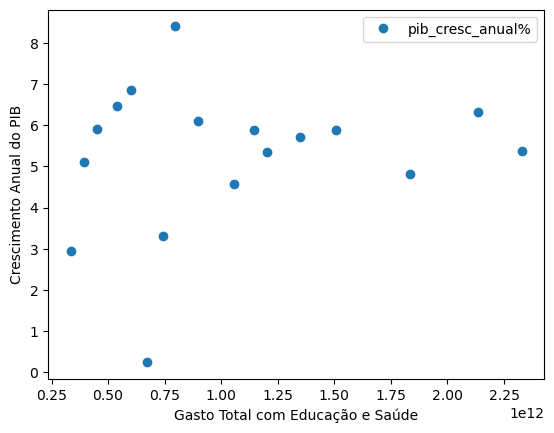

In [86]:
# Plot
df.plot(x = 'total_gastos_educ_saude', y = 'pib_cresc_anual%', style = 'o')
plt.xlabel('Gasto Total com Educação e Saúde')
plt.ylabel('Crescimento Anual do PIB')
plt.show

In [88]:
# Construindo um modelo de regressão

# Prepara x e y
x = pd.DataFrame(df['total_gastos_educ_saude'])
y = pd.DataFrame(df['pib_cresc_anual%'])

# Cria e treina o modelo
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [90]:
modelo.coef_

array([[5.2080234e-13]])

Fim.